**Importing libraries as required**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report  
from sklearn.metrics import roc_curve , plot_roc_curve, roc_auc_score 

**Dataset Read and Analysis**

Attribute Information:

1. SL: As usal
2. Timestamp: Filled up duration
3. Age: 1 = "17-20", 2 = "21-24" 3 = ">24"
4. Sex identity: 1 = "Male", 2 = "Female"
5. In which university do you study?: 1 = "Public, 2 = "Private"
6. Do you have knowledge regarding the current situation of the COVID-19 pandemic?: 0 = "NO", 1 = "YES", 2 = "Don't Know"
7. Where do you get most of the information regarding the COVID-19? 1="Facebook", 2="Messanger", 3="YouTube",4="Newspaper", 5="Newsportal", 6="TV", 7="Others"
8. Are you worried about getting infected by the COVID-19?: 0 = "Not at all worried", 1 = "Extremely worried", 2 = "Extremely worried"
9. Are you worried that your family members would get infected by COVID-19?: 0 = "Not at all worried", 1 = "Extremely worried", 2 = "Extremely worried"
10. How do you feel about measures taken to prevent the spread of the COVID-19 in Bangladesh?: 0 = "As usual", 1 = "Very good", 2 = "Very bad"
11. Are you worried about getting proper treatment if you are infected by covid-19?: 0 = "Not at all worried", 1 = "Extremely worried", 2 = "I don’t know"
12. Before the lockdown, how often did you feel nervous or stressed?: 0 = "Not at all", 1 = "Rarely", 2 = "Sometimes", 3 = "Quite often", 4 = "Most of the time"
13. Are your Studies being affected due to the lockdown?: 0 = "No", 1 = "Yes", 2 = "Don't Know"
14. Do you feel without the help of friends and teachers your studies are being affected?: 0 = "No", 1 = "Yes", 2 = "Don't Know"
15. Do you feel online classes are helping you in study?: 0 = "No", 1 = "Yes", 2 = "Don't Know"
16. Do you feel the lockdown is setting you back from your study goals?: 0 = "No", 1 = "Yes", 2 = "Don't Know"
17. Before lockdown, how often did you feel confident about your ability to handle your personal problems?: 0 = "Not at all", 1 = "Rarely", 2 = "Sometimes", 3 = "Quite often", 4 = "Most of the time"
18. Where is your current location?: 1 = "Rural", 2 = "Urban"
19. Which division do you live in?: 1 = "Khulna", 2 = "Rangpur", 3 = "Dhaka", 4 = "Rajshahi", 5 = "Barisal", 6 = "Chittagong", 7 = "Mymensingh", 8 = "Sylhet"
20. Are you living with your family?: 0 = "No", 1 = "Yes"
21. What is the total monthly income of your family?: 1 = "10k-20k", 2 = "20k-30k", 3 = "30k-40k", 4 = "40k-50k", 5 = ">50k"
22. As a student have you ever been involved in any of the extracurricular activities during lockdown?: 0 = "No", 1 = "Yes", 2 = "Don't Know"
23. Feeling nervous, anxious or on edge?: 0 = "No", 1 = "Yes"
24. Feeling down, depressed, or hopeless?: Feeling down, depressed, or hopeless? 0 = "No", 1 = "Yes"


[Repository Link of the Prediction of Depression and Anxiety using K-Nearest Neighbor Algorithm of University Students in Bangladesh.](https://github.com/mdaiyub/Depression-and-anxiety-prediction-on-university-students-of-Bangladesh.)

In [ ]:
df = pd.read_csv('/content/Data_Bangladesh_COVID-19.csv')
df.sample(3)

,SL,Timestamp,Age,Sex identity,In which university do you study?,Do you have knowledge regarding the current situation of the COVID-19 pandemic?,Where do you get most of the information regarding the COVID-19?,Are you worried about getting infected by the COVID-19?,Are you worried that your family members would get infected by COVID-19?,How do you feel about measures taken to prevent the spread of the COVID-19 in Bangladesh?,...,Do you feel online classes are helping you in study?,Do you feel the lockdown is setting you back from your study goals?,"Before lockdown, how often did you feel confident about your ability to handle your personal problems?",Where is your current location?,Which division do you live in?,Are you living with your family?,What is the total monthly income of your family?,As a student have you ever been involved in any of the extracurricular activities during lockdown?,"Feeling nervous, anxious or on edge?","Feeling down, depressed, or hopeless?"
85,86,05-06-20 23:35,2,2,1,1,6,1,1,2,...,0,1,2,2,1,1,4,1,0,1
124,125,05-07-20 2:40,2,1,1,1,6,2,2,0,...,0,1,4,2,3,1,1,1,1,1
106,107,05-07-20 0:11,2,1,1,1,1,2,2,0,...,1,0,1,2,3,1,2,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 24 columns):
 #   Column                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                  --------------  ----- 
 0   SL                                                                                                      486 non-null    int64 
 1   Timestamp                                                                                               486 non-null    object
 2   Age                                                                                                     486 non-null    int64 
 3   Sex identity                                                                                            486 non-null    int64 
 4   In which university do you study?                                                                 

In [ ]:
df.isnull().sum()

SL                                                                                                        0
Timestamp                                                                                                 0
Age                                                                                                       0
Sex identity                                                                                              0
In which university do you study?                                                                         0
Do you have knowledge regarding the current situation of the COVID-19 pandemic?                           0
Where do you get most of the information regarding the COVID-19?                                          0
Are you worried about getting infected by the COVID-19?                                                   0
Are you worried that your family members would get infected by COVID-19?                                  0
How do you feel about measur

In [ ]:
df.shape

(486, 24)

**Feature Selection of the categorical Data**

In [ ]:
df.drop(columns=['SL','Timestamp','Where do you get most of the information regarding the COVID-19?','Which division do you live in?'],axis=1,inplace=True)
df.tail(3)

,Age,Sex identity,In which university do you study?,Do you have knowledge regarding the current situation of the COVID-19 pandemic?,Are you worried about getting infected by the COVID-19?,Are you worried that your family members would get infected by COVID-19?,How do you feel about measures taken to prevent the spread of the COVID-19 in Bangladesh?,Are you worried about getting proper treatment if you are infected by covid-19?,"Before the lockdown, how often did you feel nervous or stressed?",Are your Studies being affected due to the lockdown?,Do you feel without the help of friends and teachers your studies are being affected?,Do you feel online classes are helping you in study?,Do you feel the lockdown is setting you back from your study goals?,"Before lockdown, how often did you feel confident about your ability to handle your personal problems?",Where is your current location?,Are you living with your family?,What is the total monthly income of your family?,As a student have you ever been involved in any of the extracurricular activities during lockdown?,"Feeling nervous, anxious or on edge?","Feeling down, depressed, or hopeless?"
483,2,2,1,1,1,1,2,1,3,1,1,1,1,3,1,1,2,0,1,1
484,2,1,2,1,1,1,0,1,0,1,1,1,1,3,2,1,5,1,1,1
485,2,2,1,1,1,1,1,1,2,0,1,1,1,4,2,1,5,0,1,1


**Visualization Of the Dataset**

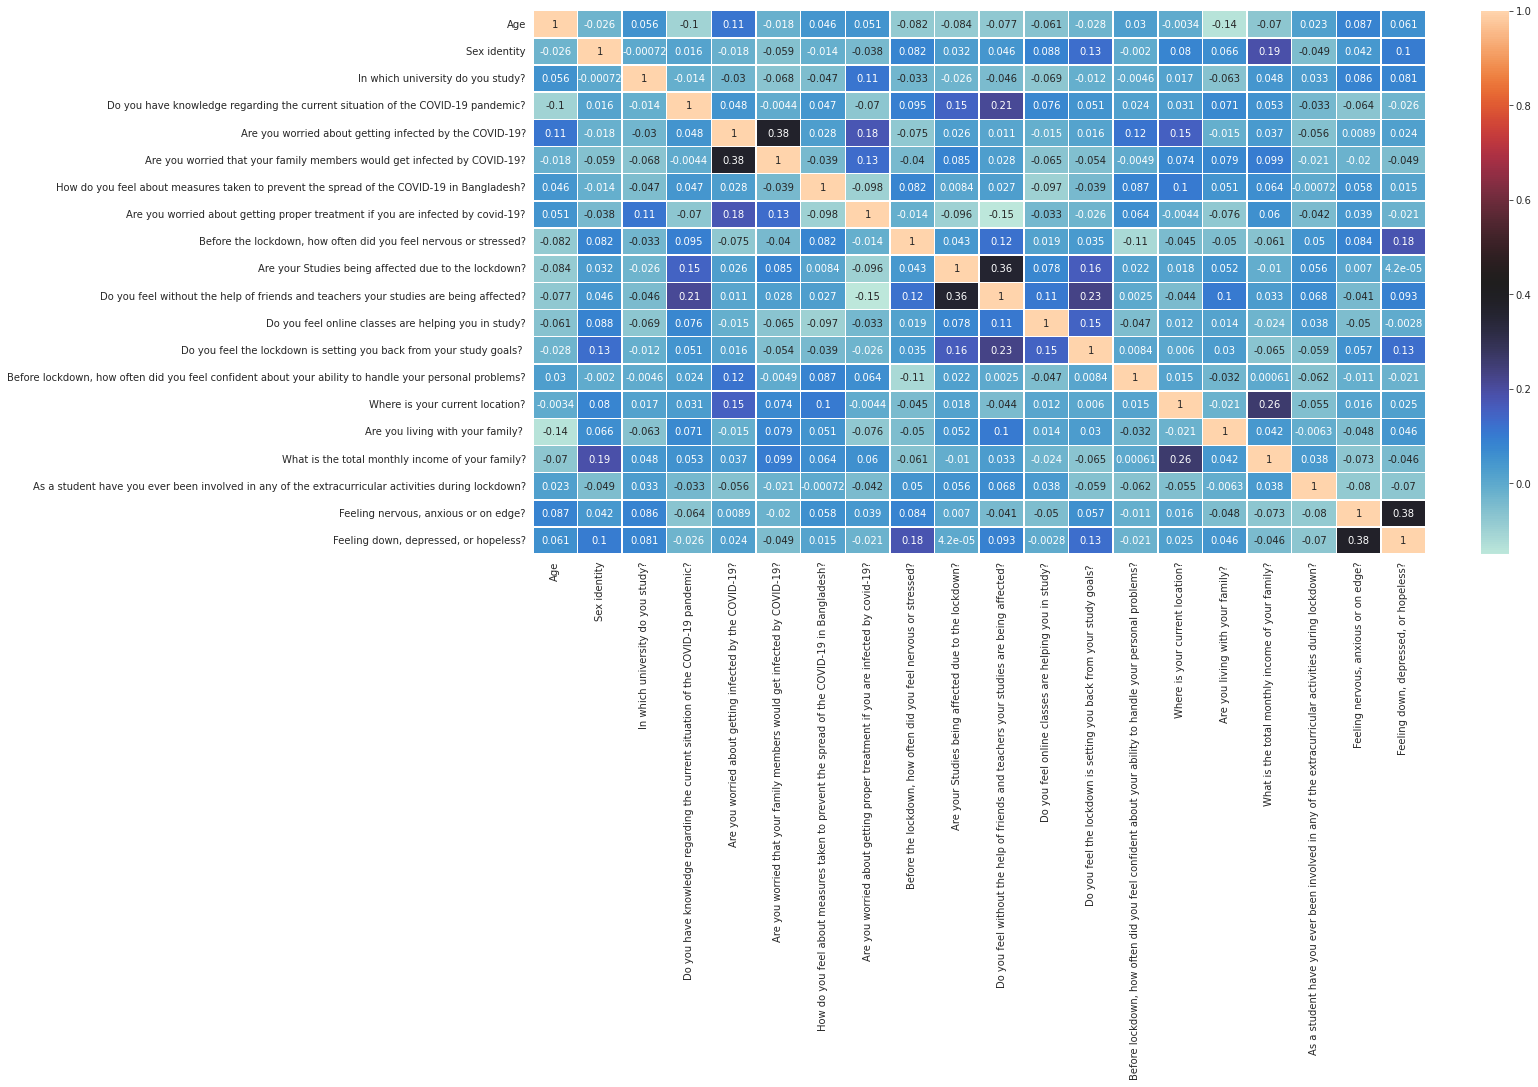

In [ ]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df.corr(),ax=ax,annot=True,linewidth=.5, cmap='icefire')

In [ ]:
#sns.pairplot(df, hue = 'Feeling nervous, anxious or on edge?')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


Error in callback <function flush_figures at 0x7fc7c45a6290> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
df['Feeling nervous, anxious or on edge?'].value_counts()

1    400
0     86
Name: Feeling nervous, anxious or on edge?, dtype: int64

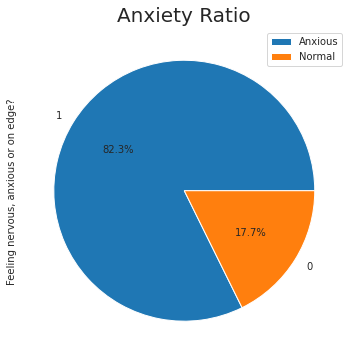

In [ ]:
plt.figure(figsize=(13,6))
df['Feeling nervous, anxious or on edge?'].value_counts().plot.pie(autopct="%.1f%%")
plt.title("Anxiety Ratio", fontsize = 20)
plt.legend(['Anxious','Normal'])

In [ ]:
#sns.pairplot(df, hue = 'Feeling down, depressed, or hopeless?')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


In [ ]:
df['Feeling down, depressed, or hopeless?'].value_counts()

In [ ]:
plt.figure(figsize=(13,6))
df['Feeling down, depressed, or hopeless?'].value_counts().plot.pie(autopct="%.1f%%")
plt.title("Depression Ratio", fontsize = 20)
plt.legend(['Depressed','Normal'])

**Data Preprocessing & feature Scaling**

In [ ]:
le=LabelEncoder()
Y_1=le.fit_transform(df['Feeling nervous, anxious or on edge?'])
Y_2=le.fit_transform(df['Feeling down, depressed, or hopeless?'])

In [ ]:
X=df.drop(columns=['Feeling nervous, anxious or on edge?','Feeling down, depressed, or hopeless?'],axis=1)

In [ ]:
sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)

**Anxiety Prediction Using K-NN**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_1, test_size=0.2, random_state = 42)

In [ ]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [ ]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(8,5))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE, linestyle = '--', color = '#7CFC00')

plt.show()

In [ ]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
train_knn = knn.score(X_train , y_train)*100
print(f"Train score:{(train_knn):.2f}")
test_knn = knn.score(X_test , y_test)*100
print(f"Test score:{(test_knn):.2f}")
kfold_knn = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_knn):.2f}")
Kfold_Std_knn = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_knn):.2f}")
f1_knn = f1_score(y_test , knn_pred)*100
print(f"F1 Score: {f1_knn:.2f}")
acc_knn = accuracies.mean()*100
print(f"Accuracy:{(acc_knn):.2f}")
print(classification_report(y_test, knn_pred))
sns.heatmap(confusion_matrix(y_test,knn_pred), annot= True, fmt= 'g')

In [ ]:
roc_knn = roc_auc_score(y_test , knn.predict_proba(X_test)[: , 1])*100
print(f"ROC AUC Score: {roc_knn:.2f}")
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)
plt.figure(figsize = (8, 5))
plot_roc_curve(knn, X_test, y_test , color = '#FF4500')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#7CFC00')
plt.show()

**Depression Prediction Using K-NN**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_2, test_size=0.3, random_state = 140)

In [ ]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())  

In [ ]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(8,5))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE, linestyle = '--', color = '#7CFC00')

plt.show()

In [ ]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
train_knn = knn.score(X_train , y_train)*100
print(f"Train score:{(train_knn):.2f}")
test_knn = knn.score(X_test , y_test)*100
print(f"Test score:{(test_knn):.2f}")
kfold_knn = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_knn):.2f}")
Kfold_Std_knn = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_knn):.2f}")
f1_knn = f1_score(y_test , knn_pred)*100
print(f"F1 Score: {f1_knn:.2f}")
acc_knn = accuracies.mean()*100
print(f"Accuracy:{(acc_knn):.2f}")
print(classification_report(y_test, knn_pred))
sns.heatmap(confusion_matrix(y_test,knn_pred), annot= True, fmt= 'g')

In [ ]:
roc_knn = roc_auc_score(y_test , knn.predict_proba(X_test)[: , 1])*100
print(f"ROC AUC Score: {roc_knn:.2f}")
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)
plt.figure(figsize = (8, 5))
plot_roc_curve(knn, X_test, y_test , color = '#FF4500')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#7CFC00')
plt.show()